## 1. Exploratory Data Analysis

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Loading Dataset

In [2]:
df = pd.read_csv('HR_Dataset.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

<AxesSubplot:>

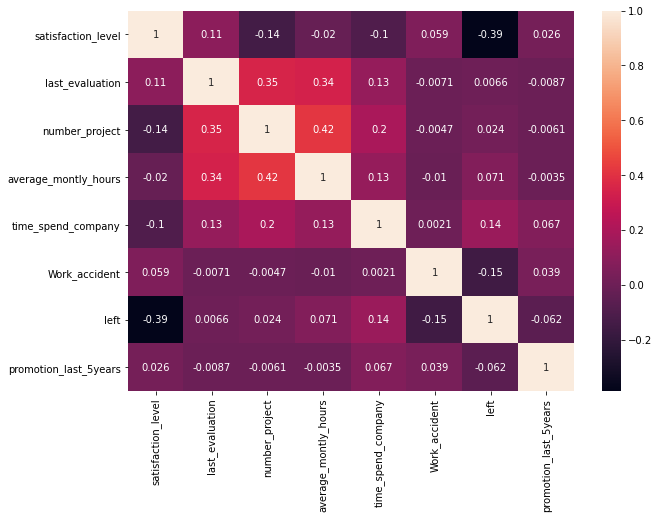

In [6]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## 2. Data Visualization

- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

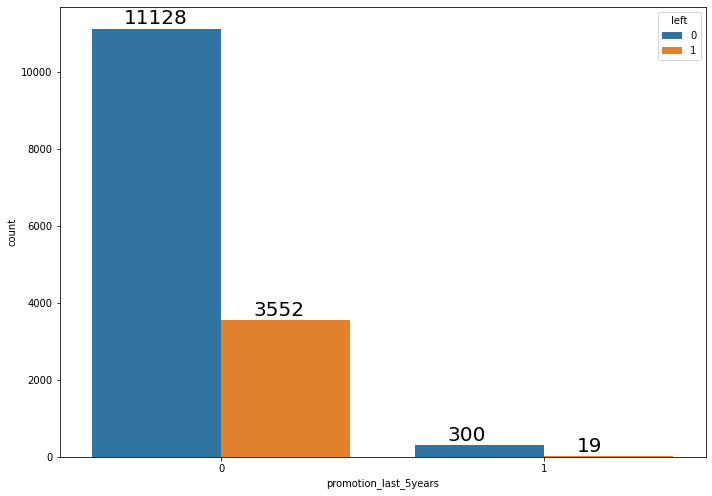

In [9]:
plt.figure(figsize = (10, 7))
g = sns.countplot(df['promotion_last_5years'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.10, p.get_height()+120), size = 20)
plt.tight_layout()

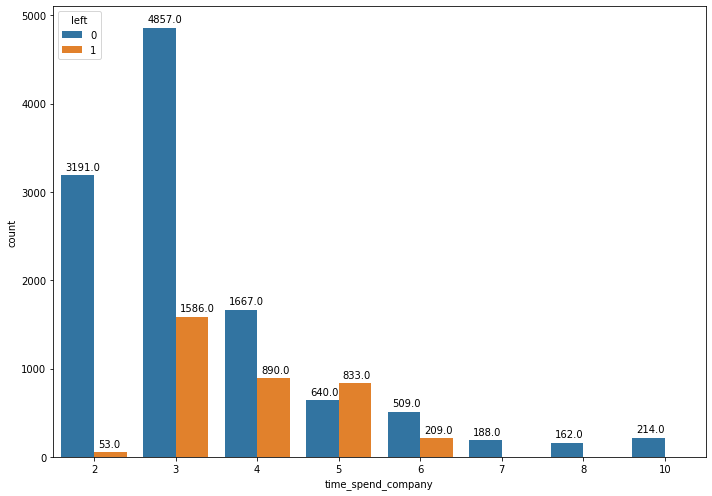

In [10]:
plt.figure(figsize = (10, 7))
g = sns.countplot(df['time_spend_company'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.05, p.get_height()+60), size = 10)
plt.tight_layout()

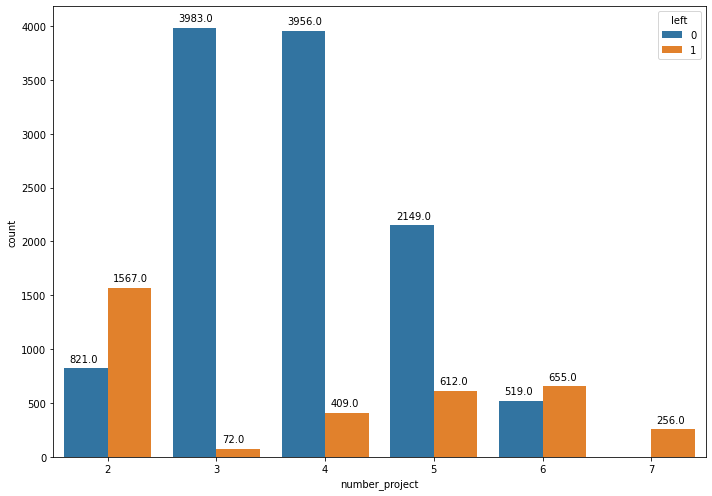

In [11]:
plt.figure(figsize = (10, 7))
g = sns.countplot(df['number_project'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.05, p.get_height()+60), size = 10)
plt.tight_layout()

<AxesSubplot:xlabel='average_montly_hours'>

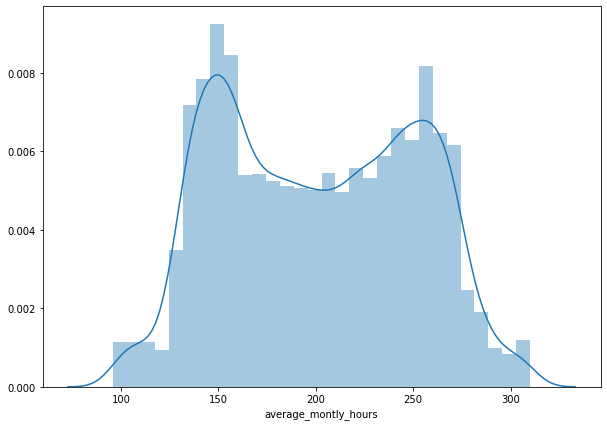

In [12]:
plt.figure(figsize = (10, 7))
sns.distplot(df['average_montly_hours'], hist = True)

### Employees Left

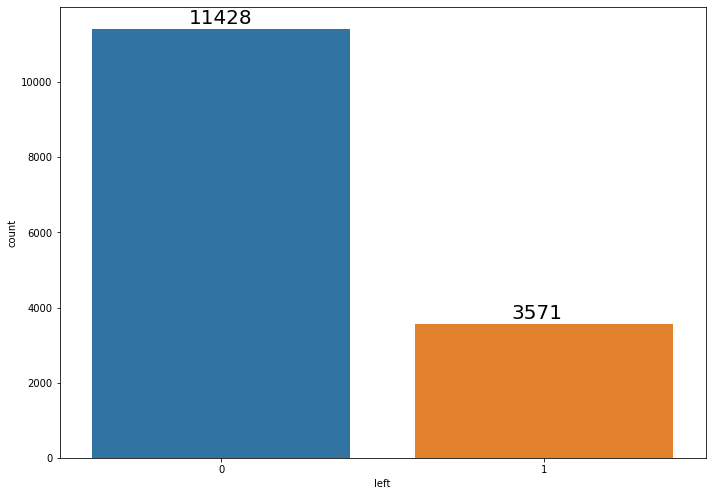

In [13]:
plt.figure(figsize = (10, 7))
g = sns.countplot(df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.30, p.get_height()+120), size = 20)
plt.tight_layout()

### Number of Projects

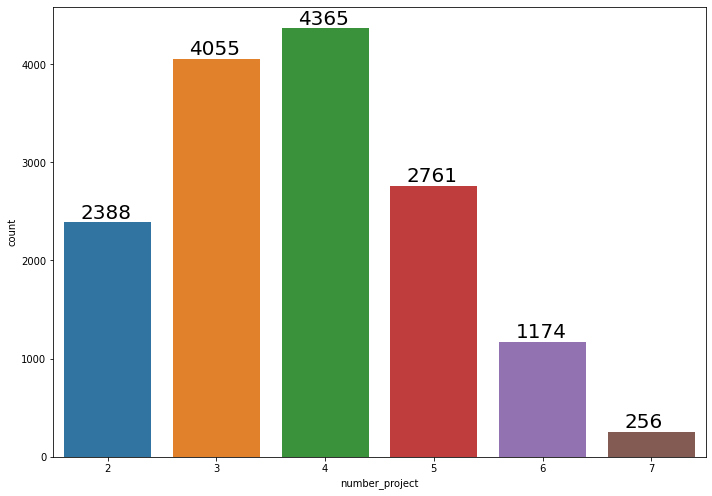

In [14]:
plt.figure(figsize = (10, 7))
g = sns.countplot(df['number_project'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.15, p.get_height()+40), size = 20)
plt.tight_layout()

### Time Spent in Company

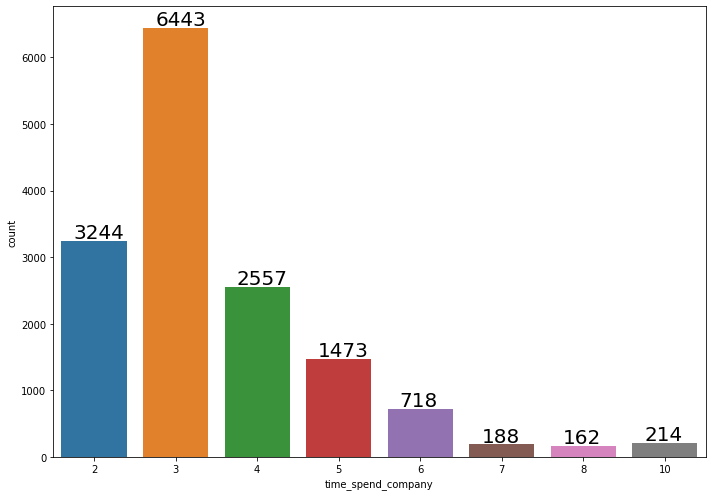

In [15]:
plt.figure(figsize = (10, 7))
g = sns.countplot(df['time_spend_company'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.15, p.get_height()+40), size = 20)
plt.tight_layout()

## 3. Data Pre-Processing

#### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df3 = label_encoder.fit_transform(df['salary'])

df3 = pd.DataFrame(df3)

In [17]:
df3.sample(10)

,0
12637,1
9795,1
7983,1
12203,1
5703,2
11672,2
10693,2
6954,0
8393,2
4527,1


In [18]:
df.loc[7054]

satisfaction_level       0.22
last_evaluation          0.64
number_project              6
average_montly_hours      260
time_spend_company          4
Work_accident               0
left                        0
promotion_last_5years       0
Departments                hr
salary                   high
Name: 7054, dtype: object

In [19]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [21]:
df['salary'] = df['salary'].map({'low' : 0, 'medium' : 1, 'high' : 2})

In [22]:
df['salary'].sample(10)

10603    0
12306    2
12075    1
7637     0
3625     0
4920     0
14350    0
12245    0
13704    0
12947    0
Name: salary, dtype: int64

In [23]:
df.loc[9873]

satisfaction_level        0.89
last_evaluation           0.64
number_project               4
average_montly_hours       151
time_spend_company           5
Work_accident                0
left                         0
promotion_last_5years        0
Departments              sales
salary                       2
Name: 9873, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [25]:
df = pd.get_dummies(df)

In [26]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## 4. Cluster Analysis

In [27]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [28]:
dfc = df.drop('left', axis = 1)
labels = df['left']

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfsc = sc.fit_transform(dfc)

In [30]:
dfsc

array([[-0.93649469, -1.08727529, -1.46286291, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [-2.02247906,  0.95755433,  2.59376348, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ]])

In [31]:
dfsc = pd.DataFrame(dfsc)
dfsc.columns = dfc.columns

In [32]:
dfsc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655


In [33]:
dfc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,0,1,0


#### The Elbow Method

In [34]:
from sklearn.cluster import KMeans
from pyclustertend import hopkins

In [35]:
hopkins(dfsc, dfsc.shape[0])

0.05563501476864101

In [36]:
ssd = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((dfsc))
    ssd.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

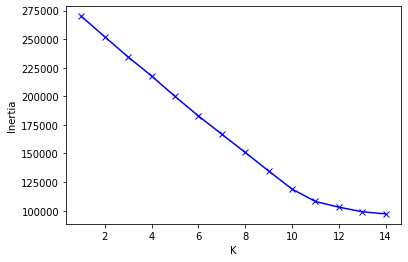

In [37]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")

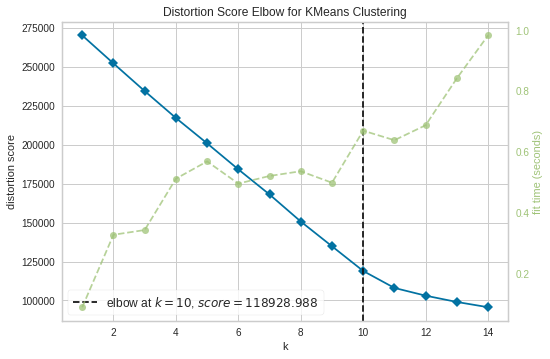

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,15))
visu.fit(dfsc)
visu.poof()

In [39]:
kmeans = KMeans(n_clusters = 10).fit(dfsc)

In [40]:
labels = kmeans.labels_

In [41]:
dfsc['clusters'] = labels

In [42]:
dfsc['clusters'].value_counts()

5    4140
4    2720
1    2229
9    1227
0     902
3     858
8     787
7     767
6     739
2     630
Name: clusters, dtype: int64

In [43]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [44]:
print(f'Silhouette Score(n=10): {silhouette_score(dfsc, labels)}')

Silhouette Score(n=10): 0.3720822217429649


In [45]:
kmeans = KMeans(n_clusters = 2).fit(dfsc)

In [46]:
labels = kmeans.labels_

In [47]:
dfsc['clusters2'] = labels

In [48]:
dfsc['clusters2'].value_counts()

1    10380
0     4619
Name: clusters2, dtype: int64

In [49]:
print(f'Silhouette Score(n=2): {silhouette_score(dfsc, labels)}')

Silhouette Score(n=2): 0.24620573909577487


In [50]:
dfsc['labels'] = df['left']

In [51]:
dfsc[['clusters', 'clusters2', 'labels']].sample(20)

,clusters,clusters2,labels
930,5,1,1
1072,3,0,1
9542,5,1,0
9961,4,1,0
7149,1,0,0
8544,9,1,0
657,1,0,1
5504,3,0,0
3319,4,1,0
14721,1,0,1


In [52]:
from sklearn.metrics.cluster import adjusted_rand_score

In [53]:
adjusted_rand_score(dfsc['labels'], dfsc['clusters2'])

-0.005731778029941425

In [54]:
adjusted_rand_score(dfsc['labels'], dfsc['clusters'])

-0.0031178727485675945

## 5. Model Building

### Split Data as Train and Test Set

In [55]:
X = df.drop('left', axis = 1)
y = df['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [56]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 7997, 1: 2502})


### Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
model_gbc = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = model_gbc.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, f1_score

In [60]:
print(confusion_matrix(y_test, y_pred))

[[3395   36]
 [  60 1009]]


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3431
           1       0.97      0.94      0.95      1069

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



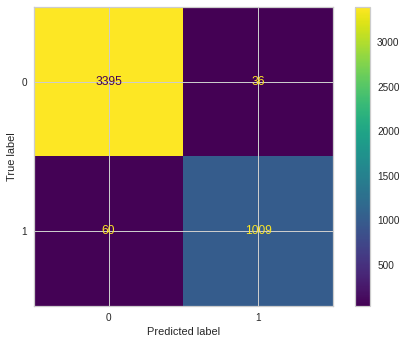

In [62]:
plot_confusion_matrix(model_gbc, X_test, y_test)

In [63]:
print(f1_score(y_test, y_pred))

0.9545884578997161


In [64]:
prediction = model_gbc.predict(X)

In [65]:
prediction[:5]

array([1, 1, 1, 1, 1])

In [66]:
pd.DataFrame(prediction).value_counts()

0    11570
1     3429
dtype: int64

In [67]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [68]:
df['left2'] = pd.DataFrame(prediction)

In [69]:
df[['left', 'left2']].sample(20)

,left,left2
2974,0,0
9348,0,0
11078,0,0
12343,1,1
12396,1,1
8293,0,0
13315,0,1
6883,0,0
5416,0,0
12068,1,1


In [70]:
df.drop('left2', axis = 1, inplace = True)

In [71]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [72]:
compare.sample(10)

,Actual,Pred
1431,1,1
6397,0,0
3505,0,0
13551,0,0
12587,1,0
10641,0,0
8328,0,0
12829,0,0
11002,0,0
1731,1,1


### Smote

In [73]:
X = df.drop('left', axis = 1)
y = df['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [74]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 7997, 1: 2502})


In [75]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [76]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

In [77]:
from imblearn.pipeline import Pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [78]:
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

In [79]:
counter = Counter(y_smote)
print(counter)

Counter({0: 5711, 1: 3998})


In [80]:
model_gbcs = GradientBoostingClassifier().fit(X_smote, y_smote)
y_pred = model_gbcs.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred))

[[3363   68]
 [  52 1017]]


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3431
           1       0.94      0.95      0.94      1069

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



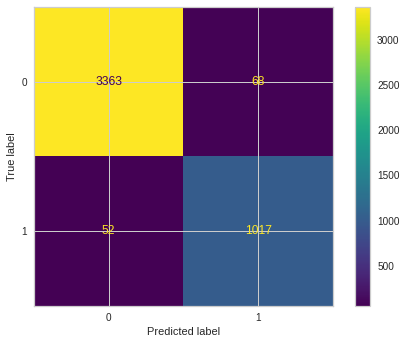

In [83]:
plot_confusion_matrix(model_gbcs, X_test, y_test)

In [84]:
print(f1_score(y_test, y_pred))

0.9442896935933147


### KNeighbors Classifier

In [85]:
X = df.drop('left', axis = 1)
y = df['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[3275  156]
 [  96  973]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3431
           1       0.86      0.91      0.89      1069

    accuracy                           0.94      4500
   macro avg       0.92      0.93      0.92      4500
weighted avg       0.95      0.94      0.94      4500

0.8853503184713376


### Smote

In [89]:
X = df.drop('left', axis = 1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

Counter({0: 5711, 1: 3998})


In [90]:
sc = StandardScaler()
X_train = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

In [91]:
knns_model = KNeighborsClassifier().fit(X_train, y_smote)

y_pred = knns_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[3206  225]
 [  80  989]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3431
           1       0.81      0.93      0.87      1069

    accuracy                           0.93      4500
   macro avg       0.90      0.93      0.91      4500
weighted avg       0.94      0.93      0.93      4500

0.8664038545773105


### Random Forest Classifier

In [92]:
X = df.drop('left', axis = 1)
y = df['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[3424    7]
 [  29 1040]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3431
           1       0.99      0.97      0.98      1069

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500

0.9829867674858223


In [95]:
X = df.drop('left', axis = 1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

Counter({0: 5711, 1: 3998})


In [96]:
rfs_model = RandomForestClassifier().fit(X_smote, y_smote)

y_pred = rfs_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred))

[[3420   11]
 [  25 1044]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3431
           1       0.99      0.98      0.98      1069

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500

0.983050847457627


## 6. Model Deployement

### Save and Export the Model as .pkl

In [97]:
import pickle
pickle.dump(rfs_model, open('model', 'wb'))

In [98]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Departments _IT',
       'Departments _RandD', 'Departments _accounting', 'Departments _hr',
       'Departments _management', 'Departments _marketing',
       'Departments _product_mng', 'Departments _sales',
       'Departments _support', 'Departments _technical'],
      dtype='object')

In [99]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
